## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Part IIII - Conclusion](#conclusion)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [66]:
#importing python libraries and packages that are to be used in the analysis
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

#Seed set by Udacity to assure I get the same answers on quizzes as they set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [67]:
#Reading in the data set
df=pd.read_csv("ab_data.csv")

b. Use the cell below to find the number of rows in the dataset.

In [68]:
#Displaying the number of rows and columns in the dataset.
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [69]:
#Displaying the number of unique values in the "students" column
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [70]:
#Calculating the percentage of converted users

#Dividing the number of converted users by the total number of users
users_converted=((df['converted'] == 1).sum()/(len(df['converted'])))

#Displaying the variable value
users_converted

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [71]:
#Counting the number of rows where group has a value of "treatment" and landing_page has a value of "old_page"
df['user_id'].loc[((df['group']=="treatment") & (df['landing_page']=="old_page"))].count()

1965

f. Do any of the rows have missing values?

In [72]:
#Checking dataframe for missing entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [73]:
#Dropping rows where group has a value of "treatment" AND landing_page has a value of "old_page"
mask=df.loc[((df['group']=="treatment") & (df['landing_page']=="old_page"))].index
df.drop(mask, inplace=True)
df.shape

#Dropping rows where group has a value of "control" AND landing_page has a value of "new_page"
mask2=df.loc[((df['group']=="control") & (df['landing_page']=="new_page"))].index
df.drop(mask2, inplace=True)

#Assigning edited version of dataframe to a new variable called "df2"
df2=df

#Displaying the number of columns and rows in the new df2 dataframe
df2.shape

(290585, 5)

In [74]:
# Double check all of the correct rows were removed - this should display a value of 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [75]:
#Displaying the number of unique user ids
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [76]:
#Calculating the number of values that are duplicated
duplicate_user_count=df2['user_id'].value_counts()==2

#Displaying the number of values that are duplicated. Only 1 value returns true
duplicate_user_count.value_counts()

False    290583
True          1
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [77]:
#Isolating the rows that are connected to the duplicate user
duplicate_user = df2[df2.duplicated(subset='user_id', keep=False)]

#Displaying the dulpicate rows
duplicate_user

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [78]:
#Dropping the first duplicate row and keeping the last
df2.drop_duplicates(subset=['user_id'], keep='last', inplace=True)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [79]:
#(Calculated earlier in question 1d)

#Dividing the number of converted users by the total number of users
users_converted=((df['converted'] == 1).sum()/(len(df['converted'])))

#Displaying the variable value
users_converted

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [80]:
#Isolating the rows of users who were in the control group
control_rows=df2.query('group=="control"')

#Calculating the percentage of control group users who converted
control_convert=((control_rows['converted'] == 1).sum()/(len(control_rows['converted'])))

#Displaying the calculated percentage
control_convert

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [81]:
#Isolating the rows of users who were in the treatment group
treatment_rows=df2.query('group=="treatment"')

#Calculating the percentage of treatment group users who converted
treatment_convert=((treatment_rows['converted'] == 1).sum()/(len(treatment_rows['converted'])))

#Displaying the calculated percentage
treatment_convert

0.11880806551510564

d. What is the probability that an individual received the new page?

In [82]:
#Calculating the percentage of users that received the new page, regardless of what group they were in
new_page_users=((df2['landing_page'] == 'new_page').sum()/(len(df2['landing_page'])))

#Displaying the calculated percentage
new_page_users

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Based on the calculations performed above, the new page was received by about 50% of participants. Of this 50%, only around 12% on average decided to convert to the new page regardless of their group.**

**If these calculations were the only ones performed, then they would show that the new page should NOT be implemented.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$H_{0}$** = **$p_{new}$** - **$p_{old}$** $\leq$ 0.05

**$H_{1}$** = **$p_{new}$** - **$p_{old}$** > 0.05

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [83]:
#Calculating the percentage of those users that converted
#for p-new and assigning the calculated percentage to a variable
new_page_convert=df2.converted.mean()

#Displaying the calculated variable 
new_page_convert

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [84]:
#Calculating the percentage of those users that converted
#for p-old and assigning the calculated percentage to a variable
old_page_convert=df2.converted.mean()

#Displaying the calculated variable 
old_page_convert

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [85]:
#Isolating the users in the treatment group
treatment_users=df2.query('group == "treatment"')

#Counting the number of those users and assigning the count to a variable
treatment_users_count=treatment_users['user_id'].count()

#Displaying the count
treatment_users_count

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [86]:
#Isolating the users in the control group
control_users=df2.query('group == "control"')

#Counting the number of those users and assigning the count to a variable
control_users_count=control_users['user_id'].count()

#Displaying the count
control_users_count

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [87]:
#Generating a new array of simulated values for users that received the new page and converted
new_page_converted = np.random.binomial(2, new_page_convert, int(treatment_users_count))

#Displaying the array created above
new_page_converted

array([1, 0, 0, ..., 0, 0, 1])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [88]:
#Generating a new array of simulated values for users that received the old page and converted
old_page_converted = np.random.binomial(2, old_page_convert, int(control_users_count))

#Displaying the array created above
old_page_converted

array([0, 0, 0, ..., 0, 1, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [89]:
#Calculating and displaying the new rate calculated above
new_page_converted.mean() - old_page_converted.mean()

6.4561969490117832e-05

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [90]:
#Generating a new array of simulated values for users that received the new page and converted
new_page_converted = np.random.binomial(treatment_users_count, new_page_convert, 10000)/treatment_users_count
    
#Generating a new array of simulated values for users that received the old page and converted
old_page_converted = np.random.binomial(control_users_count, old_page_convert, 10000)/control_users_count
    
#Appending the calculated values to the array 
p_diffs = new_page_converted - old_page_converted

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

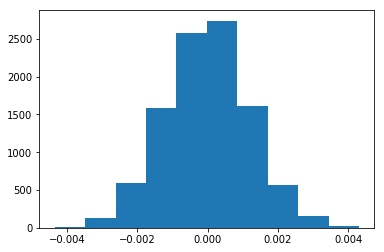

In [91]:
#Creating and displaying a histogram of the 10,000 values calaculated above to see their distribution
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [92]:
#Calculating the mean of the original dataset
ab_diff = (df2[df2['group']=="treatment"]['converted'].mean()) - (df2[df2['group']=="control"]['converted'].mean())

#Identifying the percentage of instances (out of 10,000) where p_diffs mean values were larger than the original mean
(p_diffs > ab_diff).mean()

0.90090000000000003

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**This value that has just been calculated is called the P-Value. It has a value of about 0.90, which is greater than the Type I error threshold of 0.05 that was defined as part of the null and alternative hypothesis statements. This would indicate that the null hypothesis (𝐻0 = 𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 ≤ 0.05) should be rejected, and the alternative hypothesis (𝐻1 = 𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 > 0.05) should be accepted. In other words, the new landing page should be adopted.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [93]:
#Importing the stats library and ztest package
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

#Separating the rows for old and new page users and assisgning them to masks
old_page_rows = df2.loc[(df2['landing_page'] == 'old_page')]
new_page_rows = df2.loc[(df2['landing_page'] == 'new_page')]

#Counting the number of users who accessed the old page but still converted
convert_old = (old_page_rows['converted'] == 1).sum()

#Counting the number of users who accessed the new page and converted
convert_new = (new_page_rows['converted'] == 1).sum()

#Counting the number of users in the control group
n_old = control_users['user_id'].count()

#Counting the number of users in the treatment group
n_new = treatment_users['user_id'].count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [94]:
#Running the ztest and printing the returned z-score and p-value
stat, pval = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
print("The calculated Z-score is",'{0:0.3f}'.format(stat))
print("The calculated P-value is",'{0:0.3f}'.format(pval))

The calculated Z-score is -1.311
The calculated P-value is 0.905


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The z-score (stat) and p-value (pval) calculated above do support the earlier calculations made in parts j and k. The calculations performed in both sections indicate that the conversion rates are high enough for the new landing page to be deemed a success.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**A logistic regression, which is used to find the probability of a value between zero and one, should be used here.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [95]:
#Defining the intercept for the regression
df2['intercept']= 1

#Creating a dummy column in the df2 dataframe based on the group column
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

#Display the edited df2 dataframe
df2

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [96]:
#The regression formula for determining likelihood of a user's conversion
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

#Putting the formula results into a variable
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [97]:
#Summarizing the results into a chart
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-03-21 06:42 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The p-value calculated here seems to be a result of a null and alternative hypothesis that are switched from those in Part II.**

**𝐻0 = 𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 ≤ 0.05 has become 𝐻0 = 𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 > 0.05**
        
                       **and**

**𝐻1 = 𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 > 0.05 has become 𝐻1 = 𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 $\leq$ 0.05**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Adding other factors of consideration can be helpful in strengthening a regression model, but not if there are too many, as that may unnecessarily skew the data. Also caution would need to be taken not to add irrelevant variables.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [98]:
#Reading in the countries data set
dfcountries=pd.read_csv('countries.csv')

#Checking the number of unique values in the country column
#and how many times they occur in the data set
dfcountries['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [99]:
#Joining the two data sets using the user id in both as the index
#and then assigning the new joined data set to the df2 variable
df2=df2.join(dfcountries.set_index('user_id'), on='user_id')

#Displaying the new data set and confirming changes
df2

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,US
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,US
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA


In [100]:
#Isolating the rows of users who are located in the US
us_rows=df2.query('country=="US"')

#Calculating the percentage of those users that converted
us_convert=((us_rows['converted'] == 1).sum()/(len(us_rows['converted'])))

#Isolating the rows of users who are located in Canada
ca_rows=df2.query('country=="CA"')

#Calculating the percentage of those users that converted
ca_convert=((ca_rows['converted'] == 1).sum()/(len(ca_rows['converted'])))

#Isolating the rows of users who are located in the UK
uk_rows=df2.query('country=="UK"')

#Calculating the percentage of those users that converted
uk_convert=((uk_rows['converted'] == 1).sum()/(len(uk_rows['converted'])))


#Displaying the calculated percentages for each country
print("The US conversion rate is: ",us_convert)
print("The CA conversion rate is: ",ca_convert)
print("The UK conversion rate is: ",uk_convert)
print('')#adding a space to the output for better readability

#Creating a dummy column in the new df2 dataframe for canadian users
df2['canada'] = pd.get_dummies(df2['country'])['CA']

#Creating a dummy column in the df2 dataframe for UK users
df2['uk'] = pd.get_dummies(df2['country'])['UK']

#The regression formula for determining likelihood of a user's conversion
#now with geographical location as an added parameter
log_mod2 = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'canada', 'uk']])

#Putting the formula results into a variable
results2 = log_mod2.fit()

#Summarizing the results into a chart
results2.summary2()

The US conversion rate is:  0.119546800642
The CA conversion rate is:  0.115318297814
The UK conversion rate is:  0.12059448569

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-03-21 06:42 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
canada       -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
uk            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
==================================================================

"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [101]:
#Defining a new column for the interaction between Canada users and page received
df2['ca_ab_page'] = df2['canada'] * df2['ab_page']

#Defining a new column for the interaction between UK users and page received
df2['uk_ab_page'] = df2['uk'] * df2['ab_page']

#The regression formula for determining likelihood of a user's conversion
#now with geographical location as an added parameter
log_mod3 = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'canada', 'ca_ab_page', 'uk', 'uk_ab_page']])

#Putting the formula results into a variable
results3 = log_mod3.fit()

#Summarizing the results into a chart
results3.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-03-21 06:42 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
ab_page      -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
canada       -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
ca_ab_page   -0.0469    0.0538    -0.8718  0.3833  -0.1523   0.0585
uk           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
uk_ab_page    0.0314    0.0266     1.1807  0.2377  -0.0207   0.0835
==================================================================

"""

<a id='conclusion'></a>
## Conclusion

**The new regression model doesn't show a strong significance in the relationship between a user's location and whether or not they converted. This calculation takes into account users that received either page.**

**This model also still seems to suggest that the new page should not be adopted as the conversion rate is still around only 12%, like what was calculated via the probability method in section I. In conclusion, the analysis performed in this project overall does NOT support the implementation of the new page.**

In [102]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook_Final.ipynb'])

0